# Comparision of Logistic Regression and K-Nearest Neighbour in Lung Cancer Risk Detection


## Introduction

Lung Cancer is the third most common cancer in the world and is the leading cause of death cancer. If lung cancer is found at an earlier stage before it is spread and developed, the treatment will have more chance to be successful. However, lung cancer do not usually appear until the disease is at an advanced stage. Even when lung cancer does cause symtomps, people usually ignore it or not treat it seriously. Thus, it is beneficial for people to know if they belong to the group which having high risk of lung cancer and have pre-screening plan to detect it.

This project aim is to help people check if they are at the high risk of having lung cancer and give recommendation for them to check up. Thus, the application domain is medical diagnosis


## Overview
The report contains five main sections and each section will expand on different problems which are Data Source, Problem Formulation, Methods, Result Analysis and Conclusion. First section Data Source will briefly describe the dataset used inside this project, such as how it is taken and some characteristics of it. In Problem Formulation, we explain the data points, features and labels for our ML application. Third section "Methods" is divided into two subsections which are K Nearest Neighbour andLogistic Regression. In each method, the report explain the design choice for each model and its corresponding loss functions. The design choice for features selection, data preprocessing and model validation are also mentioned in this section. Section 4 will compare and discuss the training and validation errors obtained for both considered methods. Last section expresses the finding of the project and what features could be imporved further in the future


## Data Source

The dataset was published in DataWorld, where those data is collected from the website online lung cancer prediction system and get feedback from the user. This site has implemented during period of August 2013 when the people who visited this site.

The total number of data points inside given dataset is 309. There are no missing labels or features in the dataset. The dataset includes a total of 16 columns where each column represents user’s information such as gender, age, smoking history, alcoholic assumption, previous chronic diseases and other corresponding symptoms (coughing, yellow skin, chest pain, etc). 


## Problem Formulation
- Data Points: People who attend the survey
- Features: Users information such as gender, age, chronic disease history, mental health related issues, allergy and their personal behaviors (smoking history, alcoholic assumption)
-  Label: binary value represents if it is high chance of getting lung cancer(Yes) or if it is not a high chance of having lung cancer (No)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Analysis
Extract Information from CSV data and do some data preprocessing step

In [2]:
# Load data into data frame
df = pd.read_csv("lung_cancer_info.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Get the columns of each data point
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## Features Selection Process
Since the goal of this project is to help people find out if they belong to high risk group of lung cancer, we will drop out the symbolic symtomps (which only shows up when they actually get the disease)

In [4]:
# Drop unecessary columns
df = df.drop(columns = ['YELLOW_FINGERS', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
df.head()

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,LUNG_CANCER
0,M,69,1,2,1,1,2,1,2,2,YES
1,M,74,2,1,1,2,2,2,1,1,YES
2,F,59,1,1,2,1,2,1,2,1,NO
3,M,63,2,2,1,1,1,1,1,2,NO
4,F,63,1,1,1,1,1,1,2,1,NO


In [5]:
# Get the features for each data point
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# Explore data's properties
print("Data Shape is: ", df.shape)
print("Data Information is ", df.info())

Data Shape is:  (309, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GENDER             309 non-null    object
 1   AGE                309 non-null    int64 
 2   SMOKING            309 non-null    int64 
 3   ANXIETY            309 non-null    int64 
 4   PEER_PRESSURE      309 non-null    int64 
 5   CHRONIC DISEASE    309 non-null    int64 
 6   FATIGUE            309 non-null    int64 
 7   ALLERGY            309 non-null    int64 
 8   WHEEZING           309 non-null    int64 
 9   ALCOHOL CONSUMING  309 non-null    int64 
 10  LUNG_CANCER        309 non-null    object
dtypes: int64(9), object(2)
memory usage: 26.7+ KB
Data Information is  None


In [7]:
# Clean data
df.isnull().sum()

GENDER               0
AGE                  0
SMOKING              0
ANXIETY              0
PEER_PRESSURE        0
CHRONIC DISEASE      0
FATIGUE              0
ALLERGY              0
WHEEZING             0
ALCOHOL CONSUMING    0
LUNG_CANCER          0
dtype: int64

In [8]:
# Encoding the gender and diagnosis result data
# LUNG_CANCER = YES = 1, LUNG_CANCER = NO = 0
# Gender = MALE = 1, Gender = FEMALE = 0

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

#Assigning numerical values and storing in another column
df['LUNG_CANCER'] = labelencoder.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = labelencoder.fit_transform(df['GENDER'])

df.head()

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,LUNG_CANCER
0,1,69,1,2,1,1,2,1,2,2,1
1,1,74,2,1,1,2,2,2,1,1,1
2,0,59,1,1,2,1,2,1,2,1,0
3,1,63,2,2,1,1,1,1,1,2,0
4,0,63,1,1,1,1,1,1,2,1,0


<b>Visualize the colleration map: </b> Building colleration matrix to visualize the relationship between variables present inside dataset. It helps summarizing the correlations between all variables inside dataset.

<AxesSubplot:>

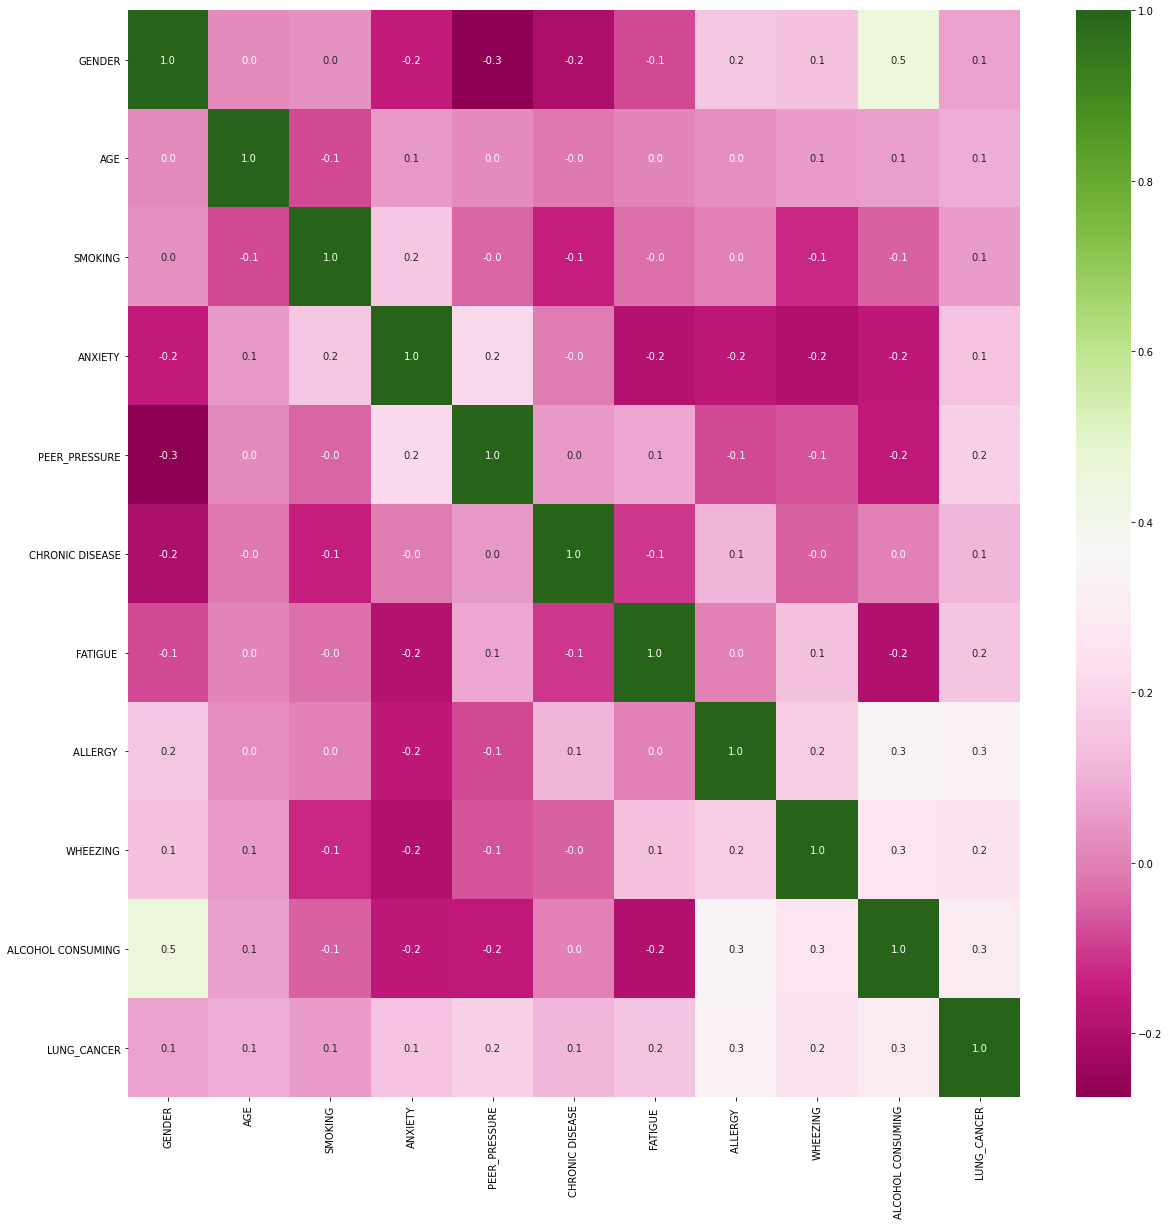

In [9]:
# Visualize colleration map
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='PiYG')

<AxesSubplot:title={'center':'Correlation between feature variable and target variable '}>

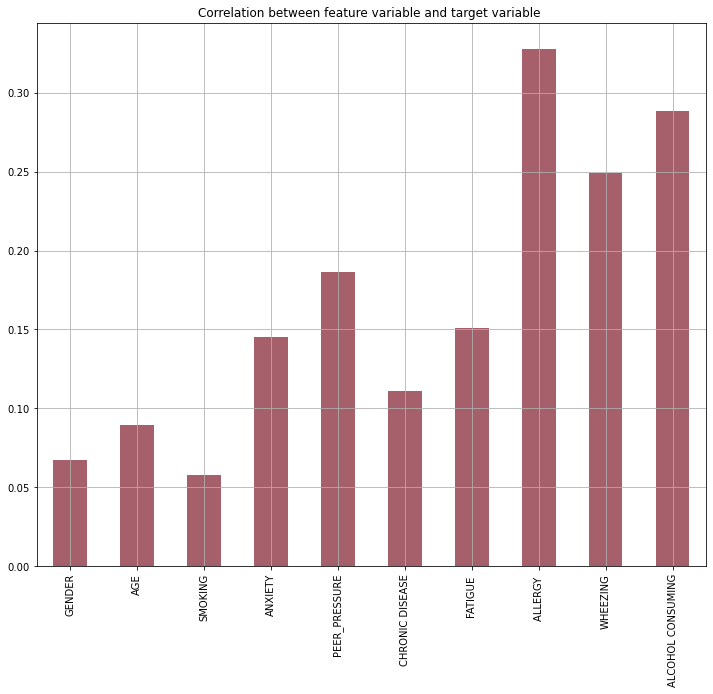

In [10]:
df.drop('LUNG_CANCER', axis=1).corrwith(df.LUNG_CANCER).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation between feature variable and target variable ",color="#A6606C")

# Methods

## Method 1: K Nearest Neighbour

### Step 2: Prepare Model

Emperical studies show that the best results are obtained if we use 20-30% of the data for validating and remain 70-80% of data for training. The main reason we choose 30:70 is because it helps us achieve the best result for the model after trials-and-errors. Another reason to use single split is it is easier to implement, with a small time complexity comparing to k fold cross validation. 

In [11]:
# Split data into features and labels
Features = df.drop(columns=['LUNG_CANCER'],axis=1)
Label = df['LUNG_CANCER']

In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

# Identify features and labels for the problem
X = scaled
y = Label

In this specific test, we create three datasets which are: X_train and y_train, X_val and y_val, X_test and y_test.
They will be used in model training, validation and testing for KNN method

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and the remaining datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1)

# Split data into remaining and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of X_val  is " ,X_val.shape)
print("Shape of Y_train is " ,y_train.shape)
print("Shape of Y_test  is " ,y_test.shape)
print("Shape of X_val  is " ,y_val.shape)


Shape of X_train is  (222, 10)
Shape of X_test  is  (31, 10)
Shape of X_val  is  (56, 10)
Shape of Y_train is  (222,)
Shape of Y_test  is  (31,)
Shape of X_val  is  (56,)


### Step 3: Model Training with KNN

##### Reasoning of choosing KNN as a model (Hypothesis Space)

In this problem, we have:
- Properly labeled data: We are predicting if a person has a high risk of lung cancer or not. The answer can only be Yes or No.
- Data Noise Free: For this dataset, almost all of the features are represented in binary value (Yes/No, Female/Male). The most ranging data here is person age, but it is practically impossible to have too wide range (i.e from 0 to 1000)
- Small dataset: The total data entries is 309.

With all of the reason indicated above, KNN is a suitable model we can use in this particular problem.

##### Model training 

1. Choose the best n neigbour value
This step is known as parameter tuning. We perform this step to achieve for a better results.

0.03571428571428571


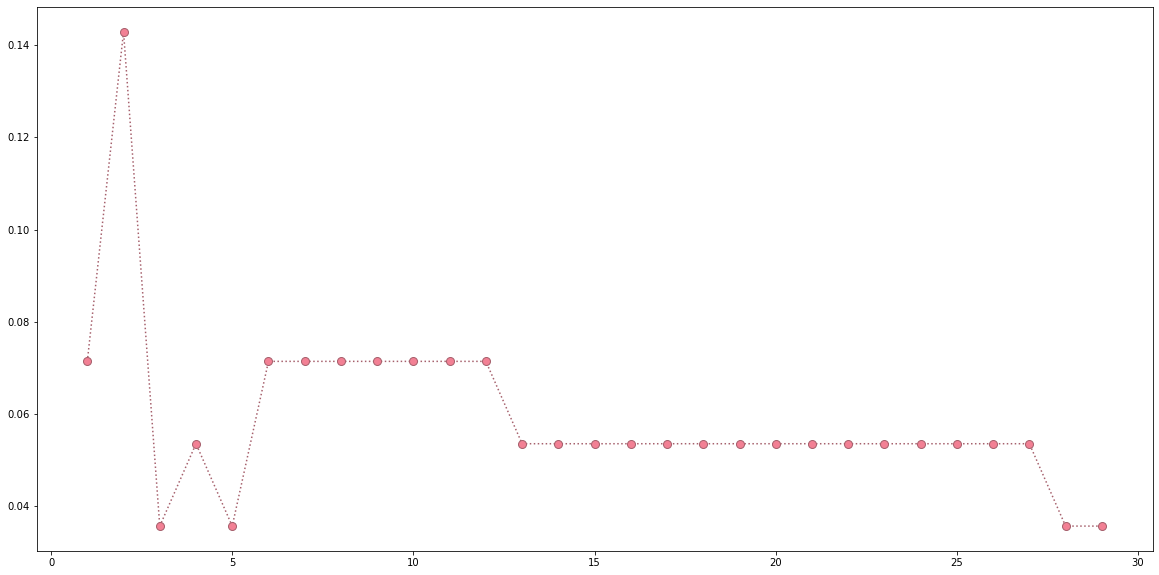

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the best n neighbour value
err_rate = [] 

# Loop through error rates from 1 to 50
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_val) # predict the value
    err_rate.append(np.mean(pred_i != y_val)) #add the value to the array
    
print(min(err_rate))

# Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,30),err_rate,color='#A6606C',linestyle='dotted',marker='o',markerfacecolor='#F28094',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

2. Training the model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)
y_train_pred = knn.predict(X_train)

# Calculate training accuracy and test accuracy for KNN Model
knn_train_acc = accuracy_score(y_train, y_train_pred)
knn_val_acc = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Validation Accuracy of KNN Model is {knn_val_acc}")

Training Accuracy of KNN Model is 0.9279279279279279
Validation Accuracy of KNN Model is 0.9464285714285714


### Step 4: KNN Result Analysis
In this section, we evaluate the result of KNN using confusion matrix and 0/1 loss function.

In this dataset, we have each person (data point) fill the survey invidually and the result of one survey does not impact on the others. Thus, we can say that the data points are interpreted as independent and identically distributed variables (iid RVs). We choose 0/1 loss function to evaluate our model as it is designed to work with iid RVs and supervised classification problem.

In [17]:
# Classification Report
print('KNN Classifier' +'\n')
print(classification_report(y_val,y_val_pred))

KNN Classifier

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.98      0.96      0.97        53

    accuracy                           0.95        56
   macro avg       0.74      0.81      0.77        56
weighted avg       0.96      0.95      0.95        56



[Text(0, 0.5, 'below zero'), Text(0, 1.5, 'above zero')]

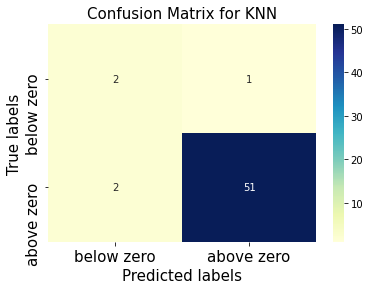

In [18]:
# Confusion matrix
ax= plt.subplot()

knn_mat = confusion_matrix(y_val,y_val_pred)
sns.heatmap(knn_mat, annot=True,cmap='YlGnBu',fmt='g')

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix for KNN',fontsize=15)
ax.xaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)
ax.yaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)

In [19]:
knn_precision = knn_mat[1,1]/(knn_mat[1,1]+knn_mat[0,1])
print("The precision of the KNN model is: ", knn_precision)

The precision of the KNN model is:  0.9807692307692307


#### Calculate the loss function
Zero-one loss is a common loss function used in classification method. It counts how many mistakes a hypothesis function has made and returns the error rate on data set. For every example that classifier missclassfies, a loss of 1 is suffered whereas correctly example lead to 0 loss

In [20]:
from sklearn.metrics import zero_one_loss

# Calculate loss function
loss = zero_one_loss(y_val, y_val_pred)
print("The 0/1 loss of this ", loss)

The 0/1 loss of this  0.0535714285714286


#### Calculate training and validation error

In [21]:
# Calculate training accuracy and test accuracy for KNN Model
knn_train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
knn_val_error = 1 - accuracy_score(y_val, y_val_pred)

print(f"Training Error of KNN Model is {knn_train_error}")
print(f"Validation Error of KNN Model is {knn_val_error}")

Training Error of KNN Model is 0.07207207207207211
Validation Error of KNN Model is 0.0535714285714286


#### Calculate test error
- Evaluate model performance on test data
- Calculate test error for model

In [22]:
# Perform model on test data
knn_test = KNeighborsClassifier(n_neighbors = 1)
knn_test.fit(X_test, y_test)
y_test_pred = knn_test.predict(X_test)

# Calculate error for test dataset
knn_test_error = zero_one_loss(y_test, y_test_pred)
print(f"Test Error of KNN Model is {knn_test_error}")

Test Error of KNN Model is 0.0


As can be seen from the cell upwards, the test error for KNN model is 0. With a 100% accuracy model, there is a possibility that the test set is not distributed properly due to blind split. There could be a chance that the test set only contains label of single category.

In this section, we will take a closer look into the actual and predicted labels.

In [23]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred.flatten()})

,Actual,Predicted
175,1,1
132,1,1
144,1,1
121,1,1
226,1,1
82,1,1
97,1,1
50,1,1
96,1,1
63,1,1


As can be seen, the test contains all the existed labels inside the dataset. Thus, the model seems to classify pretty well on the given test dataset

## Method 2: Logistic Regression

### Step 5: Prepare Model Using K-Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. To use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Split data into 5 folds
kf =KFold(n_splits=15, shuffle=True, random_state=42)

### Step 6: Model Training with Logistic Regression
Logistic Regression is a classification algorithm which is used to predict the category of independent variable using sigmoid function. Its output is 0 or 1.

1. Training model with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    print(f'Fold {i}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    # Define the model
    model_lg = LogisticRegression()

    # Train the model
    model_lg.fit(X_train, y_train)

    # Predict target values
    y_test_pred = model_lg.predict(X_test)
    y_train_pred = model_lg.predict(X_train)

### Step 7: Logistic Regression Analysis

In [ ]:
# Confusion matrix
ax= plt.subplot()

lg_mat = confusion_matrix(y_test,y_test_pred)
sns.heatmap(lg_mat, annot=True,cmap='YlGnBu',fmt='g')

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix for Logistic Regression',fontsize=15)
ax.xaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)
ax.yaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)

lg_precision = lg_mat[1,1]/(lg_mat[1,1]+lg_mat[0,1])
print("The precision of the logistic regression model is: ", lg_precision)

In [ ]:
# Visualize classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
lg_score = model_lg.score(X_test, y_test)
print("The accuracy score of the logistic regression model is: ", lg_score)

#### Calculate the loss function
The logistic loss is chosen as it allowed the use of a ready-made library for logistic regression. Cross-entropy loss increases as the predicted probability diverges from the actual label. A perfect model would have a log loss of 0

In [ ]:
from sklearn.metrics import log_loss

# Calculate loss function based on truth label and predict label
train_error = log_loss(y_test, y_test_pred)
print("The logistic loss is: ", train_error)

#### Calculate training and validation error

In [ ]:
# Calculate training accuracy and test accuracy for KNN Model
lg_train_acc = 1 - accuracy_score(y_train, y_train_pred)
lg_test_acc = 1 - accuracy_score(y_test, y_test_pred) 

print(f"Training Accuracy of Logistic Regression Model is {lg_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lg_test_acc}")

## Results Analysis

In this project, we use two different methods which are Logistic Regression and K Nearest Neigbour to explore the detection 